Created by: Jess Gallo <br>
Date Created: 04/21/2025 <br>
Last Modified: 04/21/2025 <br>
Description: Takes Elon Musk twitter data from 2010 - 2025 and uses and sentiment analysis and compares them with Tesla stock spikes to see if there is a correlation. <br>
<br>
HYPOTHESIS TEST: <br>
High-engagement, emotionally charged tweets by Elon Musk significantly impact Tesla's stock price within 1 day. <br>
Further considerations: <br>
(1) time-lag analysis : stock reactions to tweets may not always be immediate. Looking for stock movements within a specific time window might render better results. <br>
(2) multiple stocks : including other influential figures like Trump could extend my hypothesis.
<br>
<br>
(https://www.kaggle.com/datasets/dadalyndell/elon-musk-tweets-2010-to-2025-march?resource=download&select=all_musk_posts.csv): <br>
all_musk_posts.csv - Elon Musk's tweets from his official account (@elonmusk) from the very beginning till April 13, 2025. <br>
musk_quote_tweets.csv - the original tweets that Elon Musk quote-tweeted to his official account (@elonmusk) from the very beginning till April 13, 2025. <br>


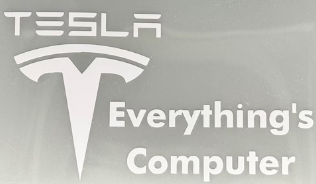

In [1]:
# IMPORTING DATA & CLEANING =============================================================

In [2]:
# imports
import pandas as pd

In [3]:
# all_musk_posts
musk_tweets = pd.read_csv("C://Users//Gallo//Downloads//musk_tweet_data//all_musk_posts.csv")
musk_tweets.head()

C:\Users\Gallo\AppData\Local\Temp\ipykernel_21568\3274160131.py:2: DtypeWarning: Columns (11,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  musk_tweets = pd.read_csv("C://Users//Gallo//Downloads//musk_tweet_data//all_musk_posts.csv")


,id,url,twitterUrl,fullText,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,...,inReplyToUserId,inReplyToUsername,isPinned,isRetweet,isQuote,isConversationControlled,possiblySensitive,quoteId,quote,retweet
0,1655159652990976000,https://x.com/elonmusk/status/1655159652990976000,https://twitter.com/elonmusk/status/1655159652...,RT @einarvollset: I read @paulg’s “How to Mak...,NaN,NaN,NaN,NaN,NaN,2023-05-07 10:36:27+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1657261624867299339,https://x.com/elonmusk/status/1657261624867299339,https://twitter.com/elonmusk/status/1657261624...,https://t.co/Zjn6r15lrR,NaN,NaN,NaN,NaN,NaN,2023-05-13 05:48:56+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1623774484795920384,https://x.com/elonmusk/status/1623774484795920384,https://twitter.com/elonmusk/status/1623774484...,RT @BillyM2k: dude bookmarks are an awesome tw...,NaN,NaN,NaN,NaN,NaN,2023-02-09 20:03:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1656900119202254854,https://x.com/elonmusk/status/1656900119202254854,https://twitter.com/elonmusk/status/1656900119...,Event Horizon Balance Beam,NaN,NaN,NaN,NaN,NaN,2023-05-12 05:52:26+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1616531874763116544,https://x.com/elonmusk/status/1616531874763116544,https://twitter.com/elonmusk/status/1616531874...,RT @BillyM2k: @elonmusk oh that’s actually pre...,NaN,NaN,NaN,NaN,NaN,2023-01-20 20:23:27+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
musk_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55099 entries, 0 to 55098
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        55099 non-null  int64  
 1   url                       55099 non-null  object 
 2   twitterUrl                55099 non-null  object 
 3   fullText                  55099 non-null  object 
 4   retweetCount              55009 non-null  float64
 5   replyCount                54297 non-null  float64
 6   likeCount                 55009 non-null  float64
 7   quoteCount                54271 non-null  float64
 8   viewCount                 34455 non-null  float64
 9   createdAt                 55099 non-null  object 
 10  bookmarkCount             54271 non-null  float64
 11  isReply                   54271 non-null  object 
 12  inReplyToId               39497 non-null  float64
 13  conversationId            54297 non-null  float64
 14  inRepl

In [5]:
# Drop columns not needed for musk_tweets
drop_cols = musk_tweets.columns[[0, 1, 2, 12, 13, 14, 15, 16, 17, 21, 22, 23]] # Replace 'tweet_id' with the actual column name
musk_tweets.drop(columns=drop_cols, inplace=True)
musk_tweets.head(5)

,fullText,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,bookmarkCount,isReply,isQuote,isConversationControlled,possiblySensitive
0,RT @einarvollset: I read @paulg’s “How to Mak...,NaN,NaN,NaN,NaN,NaN,2023-05-07 10:36:27+00:00,NaN,NaN,NaN,NaN,NaN
1,https://t.co/Zjn6r15lrR,NaN,NaN,NaN,NaN,NaN,2023-05-13 05:48:56+00:00,NaN,NaN,NaN,NaN,NaN
2,RT @BillyM2k: dude bookmarks are an awesome tw...,NaN,NaN,NaN,NaN,NaN,2023-02-09 20:03:00+00:00,NaN,NaN,NaN,NaN,NaN
3,Event Horizon Balance Beam,NaN,NaN,NaN,NaN,NaN,2023-05-12 05:52:26+00:00,NaN,NaN,NaN,NaN,NaN
4,RT @BillyM2k: @elonmusk oh that’s actually pre...,NaN,NaN,NaN,NaN,NaN,2023-01-20 20:23:27+00:00,NaN,NaN,NaN,NaN,NaN


In [6]:
musk_tweets.isnull().sum()

fullText                        0
retweetCount                   90
replyCount                    802
likeCount                      90
quoteCount                    828
viewCount                   20644
createdAt                       0
bookmarkCount                 828
isReply                       828
isQuote                       116
isConversationControlled      828
possiblySensitive           50178
dtype: int64

In [7]:
# FEATURE ENGINEERING ===================================================================

In [8]:
# Create a combined engagement score
musk_tweets['engagement_score'] = (
    musk_tweets['retweetCount'] +
    musk_tweets['replyCount'] +
    musk_tweets['likeCount'] +
    musk_tweets['quoteCount'] +
    musk_tweets['viewCount']
)

In [9]:
musk_tweets.head(2)

,fullText,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,bookmarkCount,isReply,isQuote,isConversationControlled,possiblySensitive,engagement_score
0,RT @einarvollset: I read @paulg’s “How to Mak...,NaN,NaN,NaN,NaN,NaN,2023-05-07 10:36:27+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,https://t.co/Zjn6r15lrR,NaN,NaN,NaN,NaN,NaN,2023-05-13 05:48:56+00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# PREPROCESSING & SENTIMENT ANALYSIS ====================================================

In [11]:
# imports
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Download required NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gallo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gallo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gallo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
analyzer = SentimentIntensityAnalyzer()

In [13]:
def extract_hashtags(text):
    return re.findall(r"#\w+", text)
    
def preprocess_tweet(text):
    # Save hashtags before cleaning
    hashtags = extract_hashtags(text)
    
    # Lowercase
    text = text.lower()

    # Convert emojis to text descriptions
    text = emoji.demojize(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove user mentions but KEEP hashtags
    text = re.sub(r'\@\w+', '', text)

    # Replace colons in emoji text with spaces to preserve meaning
    text = text.replace(":", " ")

    # Replace underscores with spaces so emoji descriptions remain readable
    text = text.replace("_", " ")

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join cleaned tokens back to string
    cleaned_text = ' '.join(cleaned_tokens)

    # Run VADER sentiment analysis
    sentiment_scores = analyzer.polarity_scores(cleaned_text)

    return cleaned_text, hashtags, sentiment_scores


In [14]:
# TEST TWEET
tweet = "I can't believe this is happening @jess_gallo 🚀😱 #TeslaToTheMoon # shotsfired https://www.google.com"
cleaned, hasht, sentiment = preprocess_tweet(tweet)

print("Cleaned Tweet:", cleaned)
print("Hashtag:", hasht)
print("VADER Sentiment:", sentiment)

Cleaned Tweet: ca n't believe happening rocket face screaming fear # teslatothemoon # shotsfired
Hashtag: ['#TeslaToTheMoon']
VADER Sentiment: {'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'compound': -0.7003}


In [15]:
# Create empty lists to store the results
cleaned_texts = []
hashtag_ls = []
sentiment_neg = []
sentiment_neu = []
sentiment_pos = []
sentiment_compound = []

# Loop through each tweet in the 'fullText' column and apply the preprocessing function
for tweet in musk_tweets['fullText']:
    cleaned_text, hashtags, sentiment_scores = preprocess_tweet(tweet)
    cleaned_texts.append(cleaned_text)
    hashtag_ls.append(hashtags)
    sentiment_neg.append(sentiment_scores['neg'])
    sentiment_neu.append(sentiment_scores['neu'])
    sentiment_pos.append(sentiment_scores['pos'])
    sentiment_compound.append(sentiment_scores['compound'])

# Add the new columns to the dataframe
musk_tweets['cleaned_text'] = cleaned_texts
musk_tweets['hashtag'] = hashtag_ls
musk_tweets['sentiment_neg'] = sentiment_neg
musk_tweets['sentiment_neu'] = sentiment_neu
musk_tweets['sentiment_pos'] = sentiment_pos
musk_tweets['sentiment_compound'] = sentiment_compound

# Now you have a dataframe with the new columns for sentiment and cleaned text
print(musk_tweets.head())  # To check the first few rows of the updated dataframe


                                            fullText  retweetCount  \
0  RT @einarvollset: I read @paulg’s  “How to Mak...           NaN   
1                            https://t.co/Zjn6r15lrR           NaN   
2  RT @BillyM2k: dude bookmarks are an awesome tw...           NaN   
3                         Event Horizon Balance Beam           NaN   
4  RT @BillyM2k: @elonmusk oh that’s actually pre...           NaN   

   replyCount  likeCount  quoteCount  viewCount                  createdAt  \
0         NaN        NaN         NaN        NaN  2023-05-07 10:36:27+00:00   
1         NaN        NaN         NaN        NaN  2023-05-13 05:48:56+00:00   
2         NaN        NaN         NaN        NaN  2023-02-09 20:03:00+00:00   
3         NaN        NaN         NaN        NaN  2023-05-12 05:52:26+00:00   
4         NaN        NaN         NaN        NaN  2023-01-20 20:23:27+00:00   

   bookmarkCount isReply isQuote isConversationControlled possiblySensitive  \
0            NaN     NaN     Na

In [16]:
musk_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55099 entries, 0 to 55098
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fullText                  55099 non-null  object 
 1   retweetCount              55009 non-null  float64
 2   replyCount                54297 non-null  float64
 3   likeCount                 55009 non-null  float64
 4   quoteCount                54271 non-null  float64
 5   viewCount                 34455 non-null  float64
 6   createdAt                 55099 non-null  object 
 7   bookmarkCount             54271 non-null  float64
 8   isReply                   54271 non-null  object 
 9   isQuote                   54983 non-null  object 
 10  isConversationControlled  54271 non-null  object 
 11  possiblySensitive         4921 non-null   object 
 12  engagement_score          34455 non-null  float64
 13  cleaned_text              55099 non-null  object 
 14  hashta

In [17]:
musk_tweets.drop(columns='fullText', inplace=True)
musk_tweets.head(2)

,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,bookmarkCount,isReply,isQuote,isConversationControlled,possiblySensitive,engagement_score,cleaned_text,hashtag,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,NaN,NaN,NaN,NaN,NaN,2023-05-07 10:36:27+00:00,NaN,NaN,NaN,NaN,NaN,NaN,rt read ’ “ make wealth ” hacker & amp ; paint...,[],0.0,0.849,0.151,0.4939
1,NaN,NaN,NaN,NaN,NaN,2023-05-13 05:48:56+00:00,NaN,NaN,NaN,NaN,NaN,NaN,,[],0.0,0.000,0.000,0.0000


In [18]:
# Convert createdAt column to datetime format
musk_tweets['createdAt'] = pd.to_datetime(musk_tweets['createdAt'], utc=True)
musk_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55099 entries, 0 to 55098
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   retweetCount              55009 non-null  float64            
 1   replyCount                54297 non-null  float64            
 2   likeCount                 55009 non-null  float64            
 3   quoteCount                54271 non-null  float64            
 4   viewCount                 34455 non-null  float64            
 5   createdAt                 55099 non-null  datetime64[ns, UTC]
 6   bookmarkCount             54271 non-null  float64            
 7   isReply                   54271 non-null  object             
 8   isQuote                   54983 non-null  object             
 9   isConversationControlled  54271 non-null  object             
 10  possiblySensitive         4921 non-null   object             
 11  engagement_scor

In [19]:
# Identify High-Engagement Tweets ======================================================

In [20]:
# use percentile-based for relative threshold to classify the top 10% of tweets as high engagement
threshold = musk_tweets['engagement_score'].quantile(0.90)  # top 10%
musk_tweets['high_engagement'] = musk_tweets['engagement_score'] > threshold
musk_tweets.head(2)

,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,bookmarkCount,isReply,isQuote,isConversationControlled,possiblySensitive,engagement_score,cleaned_text,hashtag,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,high_engagement
0,NaN,NaN,NaN,NaN,NaN,2023-05-07 10:36:27+00:00,NaN,NaN,NaN,NaN,NaN,NaN,rt read ’ “ make wealth ” hacker & amp ; paint...,[],0.0,0.849,0.151,0.4939,False
1,NaN,NaN,NaN,NaN,NaN,2023-05-13 05:48:56+00:00,NaN,NaN,NaN,NaN,NaN,NaN,,[],0.0,0.000,0.000,0.0000,False


In [21]:
musk_tweets['controversial'] = (musk_tweets['high_engagement']) & (musk_tweets['sentiment_compound'] < -0.5)
musk_tweets.head(2)

,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,bookmarkCount,isReply,isQuote,isConversationControlled,possiblySensitive,engagement_score,cleaned_text,hashtag,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,high_engagement,controversial
0,NaN,NaN,NaN,NaN,NaN,2023-05-07 10:36:27+00:00,NaN,NaN,NaN,NaN,NaN,NaN,rt read ’ “ make wealth ” hacker & amp ; paint...,[],0.0,0.849,0.151,0.4939,False,False
1,NaN,NaN,NaN,NaN,NaN,2023-05-13 05:48:56+00:00,NaN,NaN,NaN,NaN,NaN,NaN,,[],0.0,0.000,0.000,0.0000,False,False


In [22]:
# COMBINE SENTIMENT WITH ENGAGEMENT ====================================================

In [23]:
# adding date column for plotting
musk_tweets['date'] = musk_tweets['createdAt'].dt.date
musk_tweets.head(2)

,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,bookmarkCount,isReply,isQuote,isConversationControlled,...,engagement_score,cleaned_text,hashtag,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,high_engagement,controversial,date
0,NaN,NaN,NaN,NaN,NaN,2023-05-07 10:36:27+00:00,NaN,NaN,NaN,NaN,...,NaN,rt read ’ “ make wealth ” hacker & amp ; paint...,[],0.0,0.849,0.151,0.4939,False,False,2023-05-07
1,NaN,NaN,NaN,NaN,NaN,2023-05-13 05:48:56+00:00,NaN,NaN,NaN,NaN,...,NaN,,[],0.0,0.000,0.000,0.0000,False,False,2023-05-13


In [24]:
# adding a sentiment label
def sentiment_label(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

musk_tweets['sentiment_label'] = musk_tweets['sentiment_compound'].apply(sentiment_label)
musk_tweets.head(2)

,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,bookmarkCount,isReply,isQuote,isConversationControlled,...,cleaned_text,hashtag,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,high_engagement,controversial,date,sentiment_label
0,NaN,NaN,NaN,NaN,NaN,2023-05-07 10:36:27+00:00,NaN,NaN,NaN,NaN,...,rt read ’ “ make wealth ” hacker & amp ; paint...,[],0.0,0.849,0.151,0.4939,False,False,2023-05-07,positive
1,NaN,NaN,NaN,NaN,NaN,2023-05-13 05:48:56+00:00,NaN,NaN,NaN,NaN,...,,[],0.0,0.000,0.000,0.0000,False,False,2023-05-13,neutral


In [25]:
# Filter Tesla Tweets
tesla_keywords = ['tesla', 'model s', 'model 3', 'model x', 'model y', 'cybertruck', 'gigafactory']
musk_tweets['is_tesla_related'] = musk_tweets['cleaned_text'].apply(lambda x: any(kw in x for kw in tesla_keywords))
musk_tweets.head(2)

,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,bookmarkCount,isReply,isQuote,isConversationControlled,...,hashtag,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,high_engagement,controversial,date,sentiment_label,is_tesla_related
0,NaN,NaN,NaN,NaN,NaN,2023-05-07 10:36:27+00:00,NaN,NaN,NaN,NaN,...,[],0.0,0.849,0.151,0.4939,False,False,2023-05-07,positive,False
1,NaN,NaN,NaN,NaN,NaN,2023-05-13 05:48:56+00:00,NaN,NaN,NaN,NaN,...,[],0.0,0.000,0.000,0.0000,False,False,2023-05-13,neutral,False


In [26]:
# Filter political tweets

# List of political keywords
political_keywords = ['trump', 'biden', 'congress', 'senate', 'democrat', 'republican', 
                      'election', 'government', 'politics', 'white house', 'woke', 
                      'anti-woke', 'free speech', 'left', 'afd', 'fake news', 'america', 
                      'russia', 'ukraine', 'germany', 'propoganda', 'social security', 
                      'medicare', 'fraud', 'terrorist', 'eu', 'president' ,'politician', 
                      'tyranny', 'vance', 'taxpayer', 'zelensky', 'putin', 'american']

musk_tweets['is_political'] = musk_tweets['cleaned_text'].apply(lambda x: any(kw in x for kw in political_keywords))
musk_tweets.head(2)

,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,bookmarkCount,isReply,isQuote,isConversationControlled,...,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,high_engagement,controversial,date,sentiment_label,is_tesla_related,is_political
0,NaN,NaN,NaN,NaN,NaN,2023-05-07 10:36:27+00:00,NaN,NaN,NaN,NaN,...,0.0,0.849,0.151,0.4939,False,False,2023-05-07,positive,False,False
1,NaN,NaN,NaN,NaN,NaN,2023-05-13 05:48:56+00:00,NaN,NaN,NaN,NaN,...,0.0,0.000,0.000,0.0000,False,False,2023-05-13,neutral,False,False


In [27]:
# combining isReply, isQuote to make 1 column to identify the category of the tweet
def categorize_tweet(row):
    if row['isReply']:
        return 'reply'
    elif row['isQuote']:
        return 'quote'
    else:
        return 'original'

musk_tweets['tweet_type'] = musk_tweets.apply(categorize_tweet, axis=1)
musk_tweets.drop(['isReply', 'isQuote'], axis=1, inplace=True)
musk_tweets.head(2)

,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,bookmarkCount,isConversationControlled,possiblySensitive,engagement_score,...,sentiment_neu,sentiment_pos,sentiment_compound,high_engagement,controversial,date,sentiment_label,is_tesla_related,is_political,tweet_type
0,NaN,NaN,NaN,NaN,NaN,2023-05-07 10:36:27+00:00,NaN,NaN,NaN,NaN,...,0.849,0.151,0.4939,False,False,2023-05-07,positive,False,False,reply
1,NaN,NaN,NaN,NaN,NaN,2023-05-13 05:48:56+00:00,NaN,NaN,NaN,NaN,...,0.000,0.000,0.0000,False,False,2023-05-13,neutral,False,False,reply


In [28]:
# dropping these since we have our own sensitivity data
musk_tweets.drop(['isConversationControlled', 'possiblySensitive'], axis=1, inplace=True)
musk_tweets.head(2)

,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,bookmarkCount,engagement_score,cleaned_text,hashtag,...,sentiment_neu,sentiment_pos,sentiment_compound,high_engagement,controversial,date,sentiment_label,is_tesla_related,is_political,tweet_type
0,NaN,NaN,NaN,NaN,NaN,2023-05-07 10:36:27+00:00,NaN,NaN,rt read ’ “ make wealth ” hacker & amp ; paint...,[],...,0.849,0.151,0.4939,False,False,2023-05-07,positive,False,False,reply
1,NaN,NaN,NaN,NaN,NaN,2023-05-13 05:48:56+00:00,NaN,NaN,,[],...,0.000,0.000,0.0000,False,False,2023-05-13,neutral,False,False,reply


In [29]:
musk_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55099 entries, 0 to 55098
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   retweetCount        55009 non-null  float64            
 1   replyCount          54297 non-null  float64            
 2   likeCount           55009 non-null  float64            
 3   quoteCount          54271 non-null  float64            
 4   viewCount           34455 non-null  float64            
 5   createdAt           55099 non-null  datetime64[ns, UTC]
 6   bookmarkCount       54271 non-null  float64            
 7   engagement_score    34455 non-null  float64            
 8   cleaned_text        55099 non-null  object             
 9   hashtag             55099 non-null  object             
 10  sentiment_neg       55099 non-null  float64            
 11  sentiment_neu       55099 non-null  float64            
 12  sentiment_pos       55099 non-nu

In [30]:
# Adding rolling sentiment and rolling engagement
'''
Rolling Sentiment: Average sentiment over a window of days (or any time period), 
showing a trend rather than day-to-day fluctuations.

Rolling Engagement: Average engagement score over a period, showing a clearer view of 
how much attention Musk's tweets are getting.

Both provide a clearer, more stable view of the trends in the data since sentiment and 
engagement data can be volatile

Example: Let’s say there’s a sudden surge in positive sentiment for one tweet. Without 
rolling averages, this could be interpreted as Musk becoming more popular or his tweets 
consistently becoming more positive. But with rolling averages, you’ll be able to 
identify whether this was just a one-time spike or part of a larger upward trend in 
sentiment.
'''

# Make sure your data is sorted by time first
musk_tweets = musk_tweets.sort_values('createdAt', ascending=False)

# Add rolling averages (7-day window)
musk_tweets['rolling_sentiment'] = musk_tweets['sentiment_compound'].rolling(window=7, min_periods=1).mean()
musk_tweets['rolling_engagement'] = musk_tweets['engagement_score'].rolling(window=7, min_periods=1).mean()
musk_tweets.head(2)

,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,bookmarkCount,engagement_score,cleaned_text,hashtag,...,sentiment_compound,high_engagement,controversial,date,sentiment_label,is_tesla_related,is_political,tweet_type,rolling_sentiment,rolling_engagement
47413,1317.0,2731.0,15579.0,196.0,3135481.0,2025-04-13 21:28:44+00:00,2233.0,3155304.0,worth reading book 1493,[],...,0.2263,False,False,2025-04-13,positive,False,False,original,0.22630,3155304.0
47414,914.0,387.0,5436.0,134.0,551510.0,2025-04-13 21:27:08+00:00,285.0,558381.0,rt giga texas production us fsd unsupervised d...,[],...,0.0000,False,False,2025-04-13,neutral,False,False,original,0.11315,1856842.5


In [31]:
# ANALYZING STOCK SPIKES IN RELATION TO TWEETS =========================================

In [32]:
# import stock dataset
tesler_stock = pd.read_csv('C://Users//Gallo//Downloads//teslerr_data//TESLA 2010-2025.csv')
tesler_stock.head()

,date,open,high,low,close,adj_close,volume
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [33]:
tesler_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3686 entries, 0 to 3685
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       3686 non-null   object 
 1   open       3686 non-null   float64
 2   high       3686 non-null   float64
 3   low        3686 non-null   float64
 4   close      3686 non-null   float64
 5   adj_close  3686 non-null   float64
 6   volume     3686 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 201.7+ KB


In [34]:
# change date column to date format
tesler_stock['date'] = pd.to_datetime(tesler_stock['date'], utc=True)
tesler_stock['date'] = pd.to_datetime(tesler_stock['date']).dt.date
tesler_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3686 entries, 0 to 3685
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       3686 non-null   object 
 1   open       3686 non-null   float64
 2   high       3686 non-null   float64
 3   low        3686 non-null   float64
 4   close      3686 non-null   float64
 5   adj_close  3686 non-null   float64
 6   volume     3686 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 201.7+ KB


In [35]:
print(musk_tweets['date'].dtype)
print(tesler_stock['date'].dtype)

object
object


In [36]:
# Join the twitter data with the stock data
# Inner join keeps only overlapping dates
merged = pd.merge(musk_tweets, tesler_stock, on='date', how='inner')
merged.head()

,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,bookmarkCount,engagement_score,cleaned_text,hashtag,...,is_political,tweet_type,rolling_sentiment,rolling_engagement,open,high,low,close,adj_close,volume
0,128.0,248.0,1980.0,18.0,100787.0,2025-02-21 23:59:31+00:00,59.0,103161.0,yeah glass way,[],...,False,reply,0.129714,7.928353e+06,353.440002,354.980011,334.420013,337.799988,337.799988,74058600
1,34526.0,48619.0,173622.0,4196.0,19250539.0,2025-02-21 23:58:34+00:00,4410.0,19511502.0,messed,[],...,False,quote,-0.012971,1.070648e+07,353.440002,354.980011,334.420013,337.799988,337.799988,74058600
2,19774.0,4377.0,105732.0,369.0,9684621.0,2025-02-21 23:58:01+00:00,1284.0,9814873.0,cleaning government,[],...,True,quote,-0.083529,1.208811e+07,353.440002,354.980011,334.420013,337.799988,337.799988,74058600
3,59066.0,16589.0,205267.0,2574.0,17134893.0,2025-02-21 23:56:51+00:00,8529.0,17418389.0,tip iceberg,[],...,False,quote,-0.083529,1.455686e+07,353.440002,354.980011,334.420013,337.799988,337.799988,74058600
4,33916.0,4877.0,106497.0,679.0,9859647.0,2025-02-21 23:22:57+00:00,3791.0,10005616.0,soros & amp ; usaid undermining democracy romania,[],...,False,quote,-0.135129,9.660834e+06,353.440002,354.980011,334.420013,337.799988,337.799988,74058600


In [37]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36442 entries, 0 to 36441
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   retweetCount        36377 non-null  float64            
 1   replyCount          35896 non-null  float64            
 2   likeCount           36377 non-null  float64            
 3   quoteCount          35876 non-null  float64            
 4   viewCount           22090 non-null  float64            
 5   createdAt           36442 non-null  datetime64[ns, UTC]
 6   bookmarkCount       35876 non-null  float64            
 7   engagement_score    22090 non-null  float64            
 8   cleaned_text        36442 non-null  object             
 9   hashtag             36442 non-null  object             
 10  sentiment_neg       36442 non-null  float64            
 11  sentiment_neu       36442 non-null  float64            
 12  sentiment_pos       36442 non-nu

In [38]:
# stock price change (day over day)
merged['price_change'] = merged['close'].pct_change()

In [39]:
# add hour of the day since stock market patterns can vary based on the time of day
merged['hour_of_day'] = merged['createdAt'].dt.hour

In [40]:
# price percentage change
# percentage change in price from market open to close
merged['price_percent_change'] = ((merged['close'] - merged['open']) / merged['open']) * 100

In [41]:
# download padnas dataframe to csv
merged.to_csv('C:/Users/Gallo/Downloads/Tesla_vs_MuskTweets.csv', index=False)